### Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import string
import re
import nltk
from wordcloud import WordCloud

### Loading all the datasets

In [62]:
raw_skills_df = pd.read_csv('Raw_Skills_Dataset.csv')
technical_skills_df = pd.read_csv('Example_Technical_Skills.csv')
soft_skills_df = pd.read_csv('soft_skills.csv',usecols = ['skill_name'])

In [63]:
raw_skills_df.describe()

,RAW DATA
count,34116
unique,15677
top,Python
freq,272


In [64]:
technical_skills_df.describe()

,Technology Skills
count,27063
unique,27063
top,!Trak-it Solutions !Trak-it HR
freq,1


In [65]:
soft_skills_df.describe()

,skill_name
count,948
unique,948
top,a team oriented mentality
freq,1


### Handling Null Values


In [66]:
print(technical_skills_df.isnull().sum())
print(raw_skills_df.isnull().sum())
print(soft_skills_df.isnull().sum())

Technology Skills    0
dtype: int64
RAW DATA    0
dtype: int64
skill_name    0
dtype: int64


### Handling Duplicate Values

In [67]:
print(technical_skills_df.duplicated().sum())
technical_skills_df.drop_duplicates(inplace=True)

print(raw_skills_df.duplicated().sum())
raw_skills_df.drop_duplicates(inplace=True)


print(soft_skills_df.duplicated().sum())

0
18439
0


In [68]:
print(technical_skills_df.duplicated().sum())
print(raw_skills_df.duplicated().sum())

0
0


### Converting all values to lowercase

In [69]:
technical_skills = [i.lower() for i in technical_skills_df['Technology Skills']]#techskills lower case


soft_skills = [i.lower() for i in soft_skills_df['skill_name']]#softskills lower case

In [70]:
raw_list = [i.lower() for i in raw_skills_df['RAW DATA']]

raw_skill_list = []
for i in raw_list:
    if '\\'  in i:
        s = i.split("\\")
        for word in s:
            raw_skill_list.append(re.sub(r'[^\w\s]', '', word.strip()))
    elif  ',' or '/'  in i:
        s = re.split("[,\-!?:/]+", i)
        for word in s:
            raw_skill_list.append(re.sub(r'[^\w\s]', '', word.strip()))
    else:
        pass

#Checking Duplicates after splitting
check = pd.DataFrame(raw_skill_list)
print(check.shape)
print(check.duplicated().sum())
check.drop_duplicates(inplace=True)
print(check.shape)

raw_skill_list = [i.strip().lower() for i in check[0]]

(19329, 1)
4104
(15225, 1)


### Removing Punctuation

In [71]:
raw_text = ' '.join(str(i) for i in raw_list)# converting list into string and then joining it with space

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    return no_punct

raw_text = ''.join(remove_punctuation(raw_text))# remove punctuation

### Extracting Technical Skills 

In [72]:
word_tokens = nltk.tokenize.word_tokenize(raw_text) #tokenization
bigrams_trigram = list(map(' '.join, nltk.everygrams(word_tokens, 1, 6)))
technical = set()

for skill in bigrams_trigram:
    if skill.lower() in technical_skills:
        technical.add(skill)

In [73]:
x = set()
for word in raw_skill_list:
    if word in technical_skills:
        ind = technical_skills.index(word)

        x.add(technical_skills[ind])

In [74]:
for skill in x.difference(technical): #Adding new skills to the set
    technical.add(skill)
    
print('Technical Skills:')
print(sorted(technical),len(technical))

Technical Skills:
['3d graphics', '3d modelling', '3ds max', '4hana datasource extraction', '4hana development experience', '4hana experience', 'abap', 'abstraction', 'abstracts', 'access', 'access control', 'account management', 'accounting', 'acls', 'acoustic', 'acoustics', 'active directory', 'activemq', 'actuarial science', 'ad hoc reporting', 'ada', 'adapter', 'adb', 'adcs', 'addm', 'adf', 'adfs', 'adherence', 'adjustments', 'administration', 'ado', 'adobe creative suite', 'adobe illustrator', 'adobe photoshop', 'adtech', 'advertising', 'aerospace', 'aesthetics', 'afs', 'aggregation', 'agile development', 'agile environment', 'agile methodologies', 'agile project management', 'agile testing', 'agility', 'aircraft', 'airworthiness', 'ajax', 'akamai', 'algebra', 'algorithm', 'algorithm design', 'algorithm development', 'algorithms', 'allscripts', 'alm', 'als', 'alsa', 'alteryx', 'altium', 'altium designer', 'amazon kinesis', 'amazon lambda', 'amazon rds', 'amazon sqs', 'ambulatory',

### Extracting Soft Skills

In [75]:
soft = set()

for skill in bigrams_trigram:
    if skill.lower() in soft_skills:
        soft.add(skill)

print('Soft Skills:')
print(sorted(soft),len(soft))

Soft Skills:
['acceptance', 'accountability', 'accurate', 'active', 'administrative skills', 'aggressive', 'ambitious', 'analysis skills', 'analytic skills', 'analytical', 'analytical abilities', 'analytical mind', 'analytical skills', 'analytical thinking', 'articulate', 'autonomy', 'availability', 'building', 'calm', 'character', 'coaching', 'collaborative', 'commitment', 'committed', 'communication abilities', 'communication skill', 'communication skills', 'communications skills', 'communicative', 'communicator', 'competitive', 'conceptualization', 'confident', 'consistent', 'constructive feedback', 'consulting skills', 'coordinate', 'coordination skills', 'courteous', 'creative', 'creativity', 'critical thinking', 'curious', 'dedication', 'detailed', 'development skills', 'discipline', 'disciplined', 'discretion', 'driven', 'dynamic', 'effectiveness', 'efficient', 'empathy', 'energetic', 'energy', 'enthusiastic', 'flexible', 'friendly', 'goaloriented', 'honesty', 'independent', 'in

In [86]:
extra = set()
for skill in raw_skill_list:
    if (skill not in soft) and (skill not in technical):
        extra.add(skill)
print('Extra Data:')
print(len(extra))

Extra Data:
13943


### Displaying Technical and Soft Skills using WordCloud

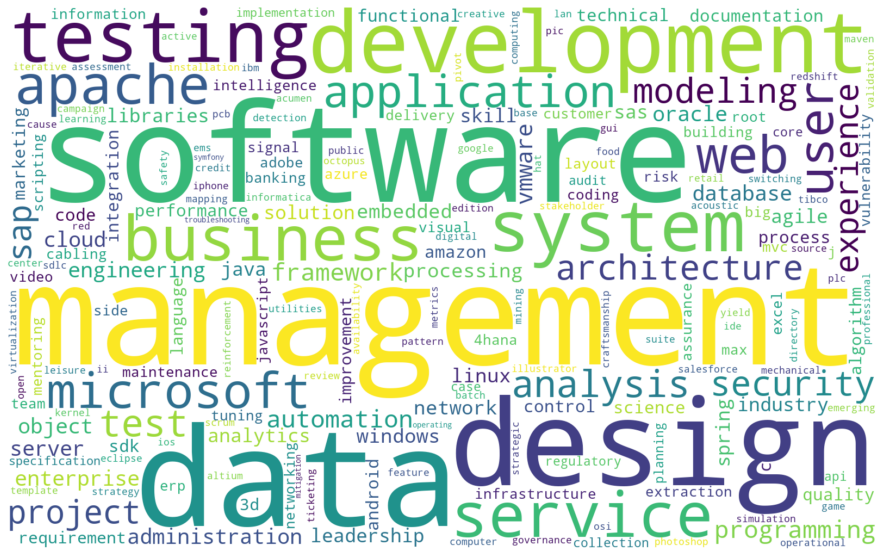

In [77]:
tech_text = ' '.join(str(i) for i in technical)
word_cloud = WordCloud(collocations = False, background_color = 'white',width = 1600,height=1000).generate(tech_text)
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

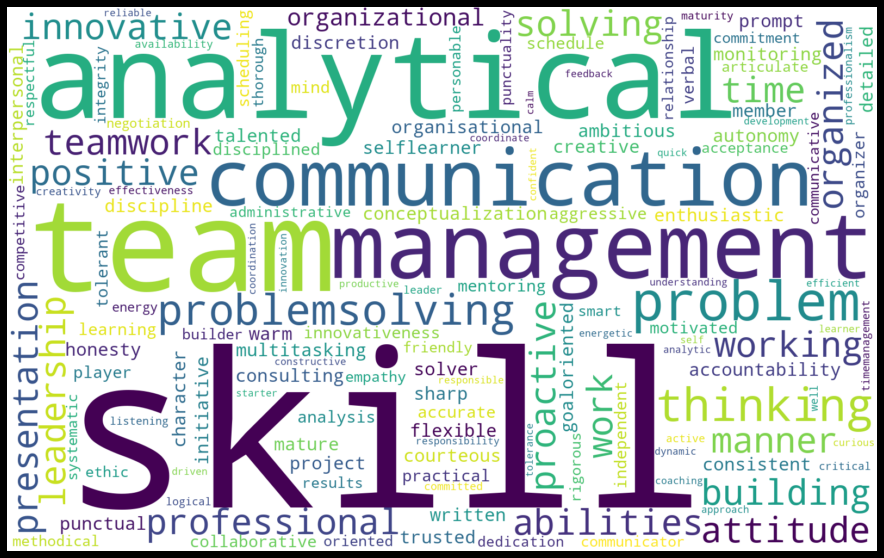

In [78]:
soft_text = ' '.join(str(i) for i in soft)
word_cloud = WordCloud(collocations = False, background_color = 'white',width = 1600,height=1000).generate(soft_text)
plt.figure( figsize=(20,10),facecolor='k' )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

plt.show()

#### I succedded in extracting 1781 Technical Skills and 149 Soft Skills from the raw dataset

In [79]:
# p = set()
# for word in raw_skill_list:
#     for skill in technical_skills:
#         if word.lower() in skill.lower():
#             ind = raw_skill_list.index(word.lower())
#             val = raw_skill_list[ind]
#             if val not in p:
#                 p.add(val)


In [80]:
# print(sorted(p.difference(technical)),len(p.difference(technical)))

In [81]:
# print(sorted(technical))

In [82]:
# all = list(p)
# len(all)

In [83]:
# stopwords= ['those', 'on', 'own', 'yourselves', 'ie', 'around', 'between', 'four', 'been', 'alone', 'off', 'am', 'then', 'other', 'can', 'cry', 'regarding', 'hereafter', 'front', 'too', 'used', 'wherein', 'doing', 'everything', 'up', 'never', 'onto', 'how', 'either', 'before', 'anyway', 'since', 'through', 'amount', 'now', 'he', 'cant', 'was', 'con', 'have', 'into', 'because', 'inc', 'not', 'therefore', 'they', 'even', 'whom', 'it', 'see', 'somewhere', 'interest', 'thereupon', 'thick', 'nothing', 'whereas', 'much', 'whenever', 'find', 'seem', 'until', 'whereby', 'at', 'ltd', 'fire', 'also', 'some', 'last', 'than', 'get', 'already', 'our', 'doesn', 'once', 'will', 'noone', 'that', 'what', 'thus', 'no', 'myself', 'out', 'next', 'whatever', 'although', 'though', 'etc', 'which', 'would', 'therein', 'nor', 'somehow', 'whereupon', 'besides', 'whoever', 'thin', 'ourselves', 'few', 'did', 'third', 'without', 'twelve', 'anything', 'against', 'while', 'twenty', 'if', 'however', 'found', 'herself', 'when', 'may', 'six', 'ours', 'done', 'seems', 'else', 'call', 'perhaps', 'had', 'nevertheless', 'fill', 'where', 'otherwise', 'still', 'within', 'its', 'for', 'together', 'elsewhere', 'throughout', 'of', 'eg', 'others', 'show', 'sincere', 'anywhere', 'anyhow', 'as', 'are', 'the', 'hence', 'something', 'hereby', 'nowhere', 'latterly', 'de', 'say', 'does', 'neither', 'his', 'go', 'forty', 'put', 'their', 'by', 'namely', 'km', 'could', 'five', 'unless', 'itself', 'is', 'nine', 'whereafter', 'down', 'bottom', 'thereby', 'such', 'both', 'she', 'become', 'whole', 'who', 'yourself', 'every', 'thru', 'except', 'very', 'several', 'among', 'being', 'be', 'mine', 'further', 'here', 'during', 'why', 'with', 'just', 'becomes', 'about', 'a', 'co', 'using', 'seeming', 'due', 'wherever', 'beforehand', 'detail', 'fifty', 'becoming', 'might', 'amongst', 'my', 'empty', 'thence', 'thereafter', 'almost', 'least', 'someone', 'often', 'from', 'keep', 'him', 'or', 'top', 'her', 'didn', 'nobody', 'sometime', 'across', 'hundred', 'only', 'via', 'name', 'eight', 'three', 'back', 'to', 'all', 'became', 'move', 'me', 'we', 'formerly', 'so', 'i', 'whence', 'describe', 'under', 'always', 'himself', 'more', 'herein', 'in', 'after', 'themselves', 'you', 'them', 'above', 'sixty', 'hasnt', 'your', 'made', 'everywhere', 'indeed', 'most', 'kg', 'fifteen', 'but', 'must', 'along', 'beside', 'hers', 'computer', 'side', 'former', 'full', 'anyone', 'has', 'yours', 'whose', 'behind', 'please', 'mill', 'amoungst', 'ten', 'seemed', 'sometimes', 'should', 'over', 'take', 'each', 'don', 'same', 'rather', 'really', 'latter', 'and', 'part', 'hereupon', 'per', 'eleven', 'ever', 'enough', 'again', 'us', 'yet', 'moreover', 'mostly', 'one', 'meanwhile', 'whither', 'there', 'toward', 'give', 'system', 'do', 'quite', 'an', 'these', 'everyone', 'towards', 'this', 'bill', 'cannot', 'un', 'afterwards', 'beyond', 'make', 'were', 'whether', 'well', 'another', 'below', 'first', 'upon', 'any', 'none', 'many', 'various', 'serious', 're', 'two', 'less', 'couldnt']

# for word in all:
#     if ('a ' in word) or ('an ' in word) or (word in stopwords) or (word==''):
#         all.remove(word)
    


In [84]:
# len(all)

In [85]:
# print(sorted(all))